In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv['data'].shape

(400, 4096)

In [6]:
oliv['images'].shape

(400, 64, 64)

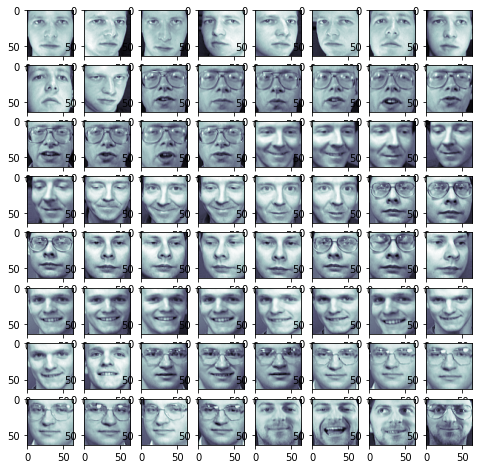

In [7]:
fig = plt.figure(figsize = (8, 8))
for i in range(64) :
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [8]:
pca = PCA()
pca.fit(oliv['data'])

PCA()

In [9]:
pca.components_.shape

(400, 4096)

In [10]:
k = 0
total = sum(pca.explained_variance_)
currsum = 0
while currsum/total < 0.95 :
    currsum += pca.explained_variance_[k]
    k += 1
print(k)

123


In [11]:
pca = PCA(n_components = k)
transformed_data = pca.fit_transform(oliv['data'])

In [12]:
transformed_data

array([[-6.4325924e+00, -7.0366836e-01, -1.4300270e+00, ...,
         3.6012523e-02, -2.6240903e-01,  4.0892519e-02],
       [-1.0758913e+00, -6.6973257e+00,  1.8427868e+00, ...,
        -2.3241055e-01, -2.0184398e-01,  9.4204098e-02],
       [-5.2929478e+00, -1.5425118e+00,  2.2594507e-01, ...,
         1.4405808e-01,  1.1249222e-01, -6.1297398e-03],
       ...,
       [ 2.0407650e+00, -1.5096191e+00,  3.4487317e+00, ...,
        -2.8856521e-02,  6.5999255e-02, -1.5916413e-01],
       [-5.1652336e+00,  8.0967617e+00, -6.7099929e-01, ...,
         1.1791268e-01, -3.1472132e-02,  2.9125726e-01],
       [-1.1505024e+00,  2.4350309e+00,  1.1894983e+00, ...,
         4.6300258e-02, -3.0576360e-01, -2.4745655e-01]], dtype=float32)

In [13]:
transformed_data.shape

(400, 123)

In [14]:
pca = PCA(n_components = k, whiten = True)
transformed_data = pca.fit_transform(oliv['data'])

In [15]:
x_approx = pca.inverse_transform(transformed_data)
x_approx

array([[0.29359323, 0.39088503, 0.45016888, ..., 0.15778305, 0.1692796 ,
        0.20811479],
       [0.5280006 , 0.50683093, 0.48839864, ..., 0.13258158, 0.15406717,
        0.089279  ],
       [0.30946088, 0.36545604, 0.46454647, ..., 0.14834148, 0.13199851,
        0.1370904 ],
       ...,
       [0.4731673 , 0.5178481 , 0.59262896, ..., 0.18929966, 0.16372263,
        0.18497296],
       [0.2840849 , 0.310335  , 0.2879464 , ..., 0.5655713 , 0.5677217 ,
        0.55195475],
       [0.4387407 , 0.42185876, 0.34152618, ..., 0.33096594, 0.31748074,
        0.37874305]], dtype=float32)

In [16]:
x_approx_images = x_approx.reshape((400, 64, 64))

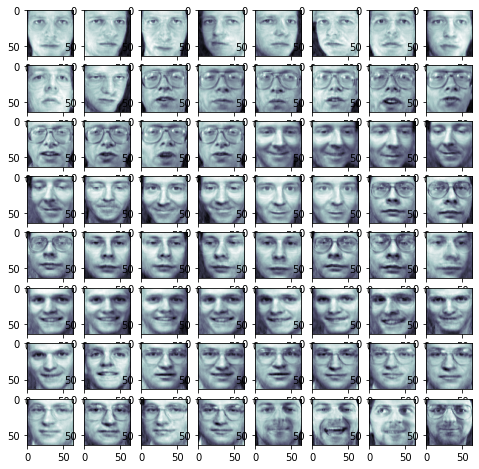

In [17]:
fig = plt.figure(figsize = (8, 8))
for i in range(64) :
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(x_approx_images [i], cmap = plt.cm.bone)
plt.show()